In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [3]:
# Using data set of cats and dogs with different dimensions
cat = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

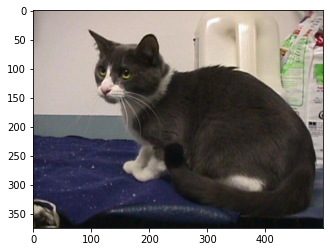

In [5]:
plt.imshow(cat)

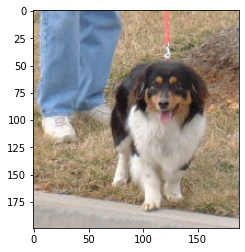

In [6]:
plt.imshow(dog)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [8]:
# Enhance model by training it with images with fluctuations, so we generate them using this method
# Mormalizing images with rescale
# Shear range is for cropping % of the image 
# There is also vertical flip but for this example we won't include it (highly unlikely to find a dog upside-down)
# Fill mode is to indicate what to do with missing pixels when stretching image
image_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1,rescale=1/255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode='nearest')

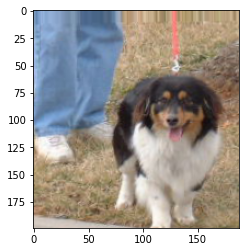

In [9]:
# See how image changes randomly following previous parameters
plt.imshow(image_gen.random_transform(dog))

In [10]:
# Now we want to apply this functionality to the entire training dataset
image_gen.flow_from_directory('CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


In [15]:
# Bulding model
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [16]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Different syntax for specifyin activation for layer (could have just added it as a parameter)
model.add(Dense(128))
model.add(Activation('relu'))

# Randomly turning off 50% of the neurons during training to help with overfitting
model.add(Dropout(0.5))

# Only 2 classifiers (Cat or dog)
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248)              0         
__________

In [18]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train', target_size =(150,150), batch_size= batch_size,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [19]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test', target_size =(150,150), batch_size= batch_size,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [20]:
# Check which index is used for each classifier
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [21]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
 33/150 [=====>........................] - ETA: 56s - loss: 0.7026 - acc: 0.4811

/Users/trinity/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/trinity/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


 90/150 [=================>............] - ETA: 28s - loss: 0.6973 - acc: 0.5049

/Users/trinity/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/Users/trinity/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/Users/trinity/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/Users/trinity/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Sk

150/150 [==============================] - 167s 1s/step - loss: 0.6957 - acc: 0.5083 - val_loss: 0.6906 - val_acc: 0.5278


In [22]:
results.history['acc']

[0.5083333333333333]

In [23]:
# This model has relatively low performance, so we are going to import a better one for testing
from keras.models import load_model

In [24]:
new_model = load_model('CATS_DOGS/cat_dog_100epochs.h5')

In [49]:
# Predicting if certain image is of a dog or cat
dog_file = 'CATS_DOGS/test/DOG/10006.jpg'

In [50]:
from keras.preprocessing import image

In [51]:
# First loading image and transforming it into an array
dog_img = image.load_img(dog_file,target_size=(150,150))
dog_img = image.img_to_array(dog_img)

In [52]:
# Because model was trained using batches, we need to reshape image into a 4D tensor (with a 1 for amount of images)
import numpy as np

In [53]:
dog_img = np.expand_dims(dog_img,axis=0)

In [54]:
dog_img.shape

(1, 150, 150, 3)

In [55]:
# Normalizing it
dog_img = dog_img / 255

In [56]:
model.predict_classes(dog_img)

array([[0]], dtype=int32)

In [57]:
# Predicted that it was a cat with 38% certainty :( need more training
model.predict(dog_img)

array([[0.3815879]], dtype=float32)